In [1]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot

In [2]:
df = pd.read_csv('diabetic_readmission_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 50)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b24e2e8>,
      dtype=object)

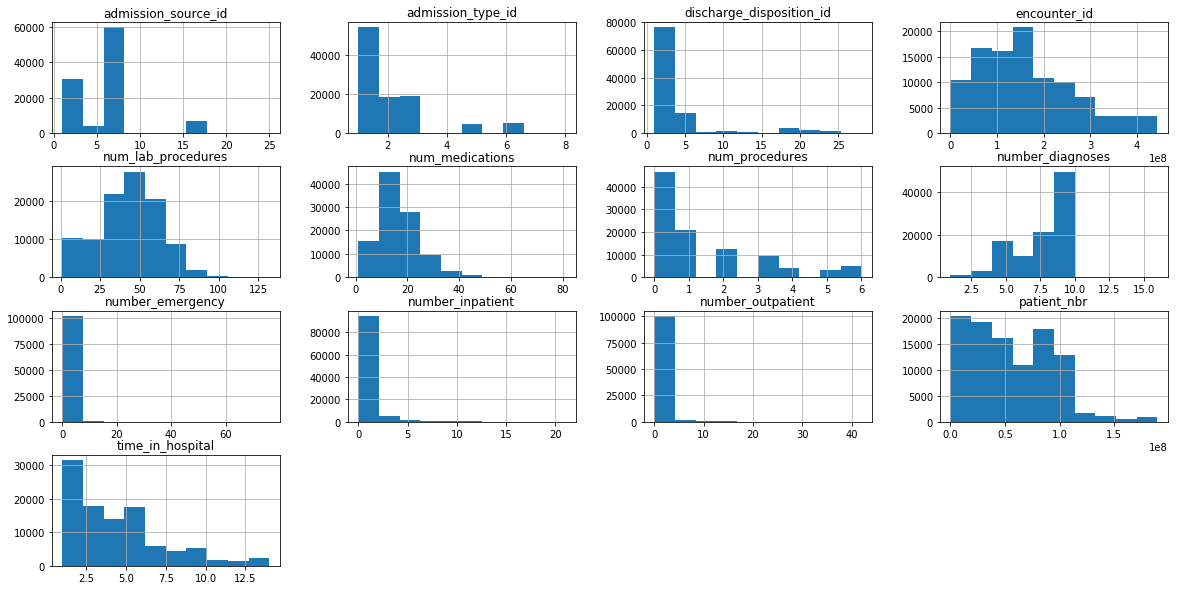

In [7]:
df.hist(figsize = (20,10))

Now lets get rid of some of the columns that we don't need. According to the abstract, 97% of the weight values are missing from this data set. Also, a little over half of the data is missing for the columns payer code and medical specialty. With so much data missing from these columns, we cant use them.

In [8]:
df = df.drop_duplicates(subset='patient_nbr', keep='first')# Drop duplicate patient Ids


df.shape

(71518, 50)

In [11]:
# Drop disposition codes 11, 13, 14, 19, 20, 21
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]
df.shape


(69973, 50)

In [26]:
# Drop missing race rows
df = df.loc[~df.race.isin(['?'])]
df.shape
df.reset_index()

,index,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,>30
8,8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [29]:
df = df.drop(['weight', 'diag_2', 'diag_3', 'payer_code', 'medical_specialty'], axis =1)

KeyError: "['weight' 'diag_2' 'diag_3' 'payer_code' 'medical_specialty'] not found in axis"

In [33]:
df.time_in_hospital.value_counts()

3     12134
2     11850
1     10178
4      9164
5      6523
6      4903
7      3792
8      2771
9      1859
10     1467
11     1155
12      896
13      742
14      621
Name: time_in_hospital, dtype: int64

In [ ]:
# Engineer New features for number of Medications used


In [ ]:
# Engineer new feature for number of changes in Medicatons



In [ ]:
# Graph number of medications used on readmission rate



In [ ]:
# Graph number of changes in medications on readmission rate



In [ ]:
# Graph age(y) and race(x) among readmits


In [ ]:
# feature engineer total number of visits in yat prior

In [36]:
df.time_in_hospital.corr(df.number_diagnoses)

0.23415336584648466

In [ ]:
df.columns

In [ ]:
df.discharge_disposition_id.value_counts(normalize=True)

In [31]:
group = df.groupby(by=['discharge_disposition_id', 'readmitted']) ['change'].describe()

In [32]:
group[:40]

count unique top   freq
discharge_disposition_id readmitted                         
1                        <30          3012      2  No   1626
                         >30         13806      2  No   7457
                         NO          26214      2  No  15036
2                        <30           205      2  No    112
                         >30           432      2  No    247
                         NO            844      2  No    508
3                        <30          1136      2  No    569
                         >30          2683      2  Ch   1422
                         NO           4702      2  No   2597
4                        <30            51      2  No     32
                         >30           160      2  No    103
                         NO            289      2  No    192
5                        <30           180      2  No     95
                         >30           240      2  No    145
                         NO            459      2  No    266
6                        <30           778      2  Ch    390
                         >30          3044      2  Ch   1546
                         NO           4288      2  Ch   2213
7                        <30            39      2  No     26
                         >30           112      2  No     58
                         NO            248      2  No    153
8                        <30             7      2  No      4
                         >30            24      2  No     15
                         NO             41      2  Ch     21
9                        <30             2      2  Ch      1
                         >30             1      1  Ch      1
                         NO              6      2  Ch      4
10                       >30             4      2  No      3
                         NO              2      1  No      2
12                       <30             1      1  No      1
                         NO              1      1  No      1
15                       <30            18      2  No     13
                         >30            12      2  Ch      7
                         NO             10      2  No      6
16                       >30             1      1  No      1
                         NO              2      1  Ch      2
17                       >30             4      1  Ch      4
                         NO              4      2  Ch      2
18                       <30           249      2  No    164
                         >30           553      2  No    388